In [51]:
!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import math

In [52]:
def show_graph(graph):

  pos = nx.get_node_attributes(graph, "pos")
  fig, ax = plt.subplots()

  for i in graph.nodes():
    ax.annotate(i, (graph.nodes[i]['pos'][0], graph.nodes[i]['pos'][1]), fontsize=15)
  
  ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
  nx.draw_networkx_edges(graph, pos, alpha=0.4, ax=ax)
  nx.draw_networkx_nodes(graph, pos, node_size=100, cmap=plt.cm.Reds_r,)
  
  plt.show()


In [53]:
def get_cost(graph, order):
  cost = 0
  for i in range(0, len(order) - 1):   
    cost += graph[order[i]][order[i+1]]['weight']

  return cost + graph[order[0]][order[len(order) - 1]]['weight']

In [54]:
def twice_around_the_tree(graph):
  mst = nx.minimum_spanning_tree(graph, weight = 'weight', algorithm="prim")
  
  order = list(nx.dfs_preorder_nodes(mst, 0))
  cost = get_cost(graph, order)
  # show_graph(mst)
  return cost


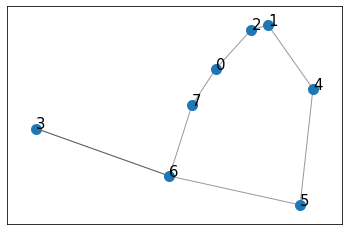

[(0, 7), (7, 6), (6, 3), (3, 6), (6, 5), (5, 4), (4, 1), (1, 2), (2, 0)]
Euclidean distance: None


In [124]:
def christofides(graph):

  mst = nx.minimum_spanning_tree(graph, weight = 'weight', algorithm="prim") # Create a minimum spanning tree T of G.

  nodes_odd_degree = [] # Let O be the set of vertices with odd degree in T.
  for v in mst.nodes():
    if mst.degree[v] % 2:
      nodes_odd_degree.append(v)

  i = graph.subgraph(nodes_odd_degree) #  I is the induced subgraph given by the vertices from O
  matching = nx.min_weight_matching(i, maxcardinality  = True) # Find a minimum-weight perfect matching M in I
  for e in matching:
    weight = graph[e[0]][e[1]]['weight']
    
  h = nx.MultiGraph(mst)
  h.add_edges_from(matching) # Combine the edges of M and T to form a connected multigraph H in which each vertex has even degree.
  circuit = list(nx.eulerian_path(h)) # Form an Eulerian circuit in H.
  print(circuit)


graph_euclidean = generate_graph('euclidean', 8)
print('Euclidean distance:', christofides (graph_euclidean))

In [127]:
def bnb_recursive(graph, cbound, cweight, level, cpath, closest, visited, res):
  if level == graph.number_of_nodes():
    if cpath[level - 1] != cpath[0]:
    
      cres = cweight + graph[cpath[level-1]][cpath[0]]['weight']
      if cres < res:
          res = cres
    return res

  for v in graph.nodes():
    if cpath[level-1] != v and visited[v] == False:

      temp = cbound;
      cweight += graph[cpath[level-1]][v]['weight'];
  
      if level == 1:
        cbound -= ((closest[cpath[level-1]][0] + closest[v][0])/2)
      else:
        cbound -= ((closest[cpath[level-1]][1] + closest[v][0])/2)
      if (cbound + cweight) < res:
        cpath[level] = v
        visited[v] = True
        res = bnb_recursive(graph, cbound, cweight, level+1, cpath, closest, visited, res)
      
      cweight -= graph[cpath[level-1]][v]['weight']
      cbound = temp;
  
      visited = [False for i in graph.nodes()]
      for i in range(0,level):
          visited[cpath[i]] = True;
          
  return res

def branch_and_bound(graph):
  cbound = 0
  closest = []
  cpath = [-1 for i in range(0, graph.number_of_nodes()+1)]
  visited = [False for i in graph.nodes()]

  for v in graph.nodes():
    min_weight_neighbors = sorted(graph[v].items(), key=lambda e: e[1]["weight"] if e[1]["weight"] != 0  else 1000000000)[:2]     
    closest.append([min_weight_neighbors[0][1]['weight'], min_weight_neighbors[1][1]['weight']])
    cbound += (min_weight_neighbors[0][1]['weight']+ min_weight_neighbors[1][1]['weight'])/2

  
  visited[0] = True
  cpath[0] = 0

  return bnb_recursive(graph, cbound, 0, 1, cpath, closest, visited, math.inf)

In [57]:
def distance(v1, v2, metric):
  if metric == 'euclidean':
    return ((v1[0] - v2[0])**2 + (v1[1] - v2[1])**2)**(1/2)
  else:
    return abs(v1[0] - v2[0]) + abs(v1[1] - v2[1])

def generate_graph(metric, amount_of_nodes):

  graph = nx.soft_random_geometric_graph(n = amount_of_nodes, radius  = 10, dim = 2, p_dist = lambda dist: 1, seed = 5)
  for i in graph.nodes():
    for j in graph.nodes():
      if i != j:
        dist = distance(graph.nodes[i]['pos'], graph.nodes[j]['pos'], metric)
        graph.add_edge(i, j, weight = dist)
      
  return graph

In [128]:
 def instance_maker(): 
  for i in range (4, 5):
    graph_euclidean = generate_graph('euclidean', 2**i)
    graph_manhattan = generate_graph('manhattan', 2**i)
    # show_graph(graph_euclidean)

    print('\nTwice around the tree', 2**i, 'nodes:')
    print('Euclidean distance:', twice_around_the_tree(graph_euclidean))
    print('Manhattan distance:', twice_around_the_tree(graph_manhattan))
    
    print('\nBranch and Bound', 2**i, 'nodes:')
    print('Euclidean distance:', branch_and_bound(graph_euclidean))
    print('Manhattan distance:', branch_and_bound(graph_manhattan))

    # print('\nChristofides ', 2**i, 'nodes:')
    # print('Euclidean distance:', christofides (graph_euclidean))
    # print('Manhattan distance:', christofides(graph_manhattan))
    

instance_maker()


Twice around the tree 16 nodes:
Euclidean distance: 5.11529544230702
Manhattan distance: 4.766660928684083

Branch and Bound 16 nodes:
Euclidean distance: 3.8029488007934487
Manhattan distance: 4.527207942654778
